# EX1


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset of minist fashion

In [12]:
fm_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fm_data.load_data()

In this dataset we don't have the names of the classes. So we have to add them

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data


Now we will check the shape of the trained iamges.

In [16]:
train_images.shape

(60000, 28, 28)

(60000, 28, 28)
This means that we have 60000 images in the training dataset and the shape of each image in 28*28.
Now let's make sure of the number of these images and the shape of each image

In [24]:
len(train_images), train_images[0].shape

(60000, (28, 28))

In [28]:
len(train_labels), len(test_labels)

(60000, 10000)

Now we will plot and see the first and last images in this data set

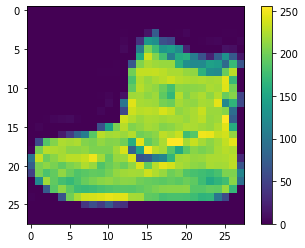

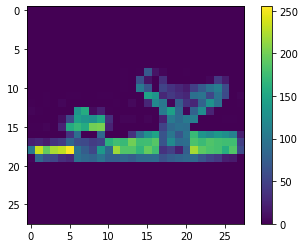

In [37]:
plt.figure()
plt.imshow(train_images[0])

plt.colorbar()
plt.grid(False)
plt.show()
plt.imshow(train_images[-1])
plt.colorbar()
plt.grid(False)
plt.show()

Note that the color bar represent the degree of the color from 0 to 255


# Now  we will do normalization to data from 255 to range from 0 to 1 
this means that our data will be divided by 255.0
Why 255 ? because our data is ranging from 0 to 255 and we are going to normalize them to (0-1).


In [38]:
train_images = train_images / 255.0

test_images = test_images / 255.0

This is the last step in the verification of data. So we can few images of the training set to make sure that everything is going well. 



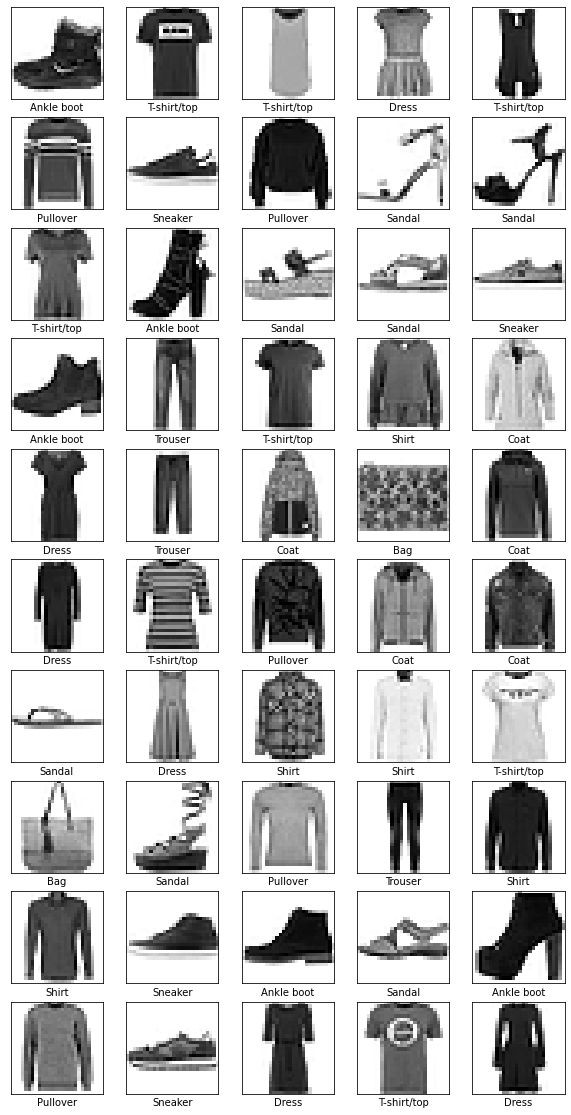

In [48]:
plt.figure(figsize=(10,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Now our data is ready. Let's try to build our model 
model_1 will be the first model

In [49]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10)
])

Now the model will be compiled
SpareseCategoricalentropy loss function is use because this is a multiclass classification model

In [53]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

The next step which is the third in the model life cycle is the training model and we will do only 5 epochs
Verbose=1  because we want to see the training process

In [56]:
model_1.fit(train_images,train_labels, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.8986
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2606 - accuracy: 0.9025
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9051
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2417 - accuracy: 0.9094
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2360 - accuracy: 0.9114


The next step is the model evaluation to evaluate this model and see if we want to adjust some parameters to increase the accuracy. 
So we are calculating the test loss and accuracy

In [58]:
test_loss, test_acc = model_1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3450 - accuracy: 0.8776

Test accuracy: 0.8776000142097473


Now  our model is ready and the accuray is 87%. It is not too good but we will do some predictions and re-train the model. 
We are adding the softmax layer to convert the logits to probabilities, which are easier to interpret

In [60]:
probability_model = tf.keras.Sequential([model_1, tf.keras.layers.Softmax()])

In [62]:
predictions = probability_model.predict(test_images)

In [65]:
np.argmax(predictions[110])

2

The following script is copied form the tensorflow docmentation to draw the image with it result

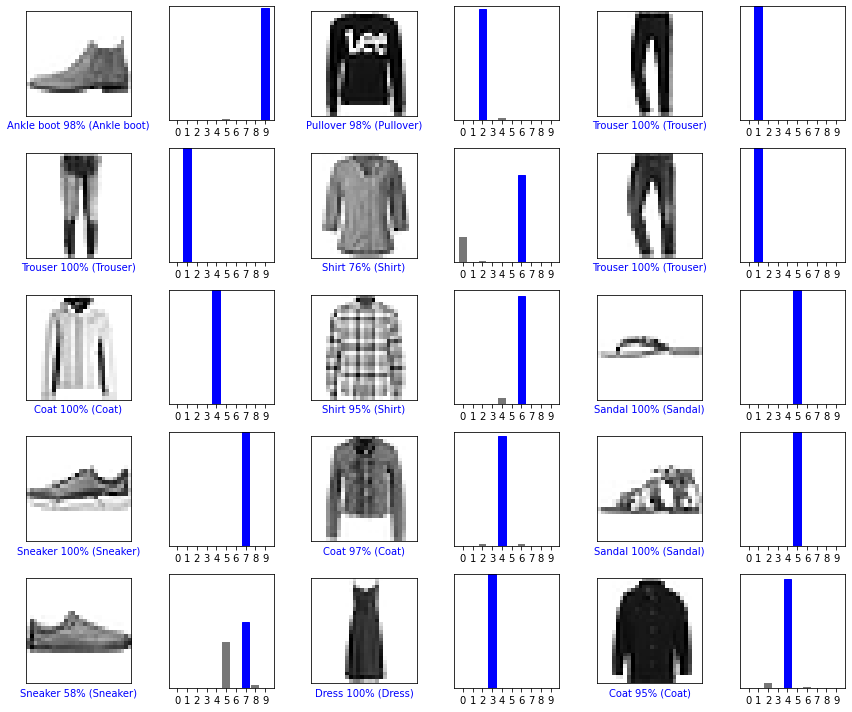

In [68]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  # Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Model Improvement 
model_2 will be trained for longer (10 Epochs)



In [70]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_2.fit(train_images,train_labels, epochs=10, verbose=1)
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5058 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3401 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2549 - accuracy: 0.9054
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.248

model_3 will be trained for longer (100 Epochs)

In [72]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_3.fit(train_images,train_labels, epochs=100, verbose=1)
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2) 

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5052 - accuracy: 0.8222
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3798 - accuracy: 0.8634
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.8754
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3208 - accuracy: 0.8839
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.8884
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2891 - accuracy: 0.8932
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - accuracy: 0.8977
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9024
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9040
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

in model_4 we will increase the number of points inside the layer and we  will add a new layer but with 10 epochs

In [73]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_4.fit(train_images,train_labels, epochs=10, verbose=1)
test_loss, test_acc = model_4.evaluate(test_images,  test_labels, verbose=2) 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4847 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3627 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3298 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3061 - accuracy: 0.8878
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2881 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2636 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9070
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2418 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.232

# We noticed an increase in the accuracy when we added a new layer. we will repeat it

In [74]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_5.fit(train_images,train_labels, epochs=10, verbose=1)
test_loss, test_acc = model_5.evaluate(test_images,  test_labels, verbose=2) 

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4808 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3637 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3263 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3021 - accuracy: 0.8889
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2867 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2708 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2586 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2483 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2400 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.229

Increase the number of points

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_6.fit(train_images,train_labels, epochs=10, verbose=1)
test_loss, test_acc = model_6.evaluate(test_images,  test_labels, verbose=2) 

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4748 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3623 - accuracy: 0.8661
Epoch 3/10
1042/1875 [===============>..............] - ETA: 6s - loss: 0.3313 - accuracy: 0.8767